In [1]:
import uproot
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
notAHit = 2147483647 #This is the number returned when something is not a hit

In [3]:
DY = uproot.open("DrellYan_2021June22_100K.root")

In [4]:
DY.values()

[<TTree 'QA_ana' (105 branches) at 0x7fdbb9153c70>]

In [5]:
DY.keys()

['QA_ana;3', 'QA_ana;2']

In [6]:
DY[DY.keys()[0]].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
n_tracks             | int32_t                  | AsDtype('>i4')
detectorID           | int32_t[500]             | AsDtype("('>i4', (500,))")
elementID            | int32_t[500]             | AsDtype("('>i4', (500,))")
pid                  | int32_t[]                | AsJagged(AsDtype('>i4'))
gvx                  | float[]                  | AsJagged(AsDtype('>f4'))
gvy                  | float[]                  | AsJagged(AsDtype('>f4'))
gvz                  | float[]                  | AsJagged(AsDtype('>f4'))
gpx                  | float[]                  | AsJagged(AsDtype('>f4'))
gpy                  | float[]                  | AsJagged(AsDtype('>f4'))
gpz                  | float[]                  | AsJagged(AsDtype('>f4'))
gpt                  | float[]                  | AsJagged(AsDtype('>f4'))
geta               

In [7]:
DY[DY.keys()[0]].keys()

['n_tracks',
 'detectorID',
 'elementID',
 'pid',
 'gvx',
 'gvy',
 'gvz',
 'gpx',
 'gpy',
 'gpz',
 'gpt',
 'geta',
 'gphi',
 'sq_px_st1',
 'sq_py_st1',
 'sq_pz_st1',
 'sq_px_st2',
 'sq_py_st2',
 'sq_pz_st2',
 'sq_px_st3',
 'sq_py_st3',
 'sq_pz_st3',
 'nhits_track',
 'H1B_ele',
 'H1T_ele',
 'H1L_ele',
 'H1R_ele',
 'H2L_ele',
 'H2R_ele',
 'H2B_ele',
 'H2T_ele',
 'H3B_ele',
 'H3T_ele',
 'H4Y1L_ele',
 'H4Y1R_ele',
 'H4Y2L_ele',
 'H4Y2R_ele',
 'H4B_ele',
 'H4T_ele',
 'P1Y1_ele',
 'P1Y2_ele',
 'P1X1_ele',
 'P1X2_ele',
 'P2X1_ele',
 'P2X2_ele',
 'P2Y1_ele',
 'P2Y2_ele',
 'DP1TL_ele',
 'DP1TR_ele',
 'DP1BL_ele',
 'DP1BR_ele',
 'DP2TL_ele',
 'DP2TR_ele',
 'DP2BL_ele',
 'DP2BR_ele',
 'triggerbits',
 'trig_bits',
 'D0U_ele',
 'D0Up_ele',
 'D0X_ele',
 'D0Xp_ele',
 'D0V_ele',
 'D0Vp_ele',
 'D2U_ele',
 'D2Up_ele',
 'D2X_ele',
 'D2Xp_ele',
 'D2V_ele',
 'D2Vp_ele',
 'D3pU_ele',
 'D3pUp_ele',
 'D3pX_ele',
 'D3pXp_ele',
 'D3pV_ele',
 'D3pVp_ele',
 'D3mU_ele',
 'D3mUp_ele',
 'D3mX_ele',
 'D3mXp_ele',
 'D

In [8]:
elementIDs = DY[DY.keys()[0]]["triggerbits"].arrays(library='pd')
elementIDs.head()

,triggerbits[0],triggerbits[1],triggerbits[2],triggerbits[3],triggerbits[4],triggerbits[5],triggerbits[6],triggerbits[7],triggerbits[8],triggerbits[9]
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [9]:
#cell size, Ncells, tilt angle, width, height, z position 
nCells = {
(0.635, 201, 0.245, 101.6, 121.92, 594.49): 'D0U_ele',
(0.635, 201, 0.245, 101.6, 121.92, 595.13): 'D0Up_ele',
(0.635, 160, 0, 101.6, 121.92, 617.09): 'D0X_ele',
(0.635, 160, 0, 101.6, 121.92, 617.72): 'D0Xp_ele',
(0.635, 201, -0.245, 101.6, 121.92, 637.17): 'D0V_ele',
(0.635, 201, -0.245, 101.6, 121.92, 637.81): 'D0Vp_ele',##END OF D0
    
(2.021, 128, -0.245, 233.27,264.16,1314.98):'D2V_ele',
(2.021, 128,-0.245,233.27,264.16,1321.96):'D2Vp_ele',
(2.083, 112,0,233.27,264.16,1340.36):'D2Xp_ele',
(2.083, 112,0,233.27,264.16,1347.34):'D2X_ele',
(2.021, 128,0,233.27,264.16,1365.99):'D2U_ele',
(2.021, 128,0,233.27,264.16,1372.98):'D2Up_ele',##END OF D2
    
(2, 134,0.245,320,166,1923.33):'D3pVp_ele',
(2, 134,0.245,320,166,1925.33):'D3pV_ele',
(2, 116,0,320,166,1929.33):'D3pXp_ele',
(2, 116,0,320,166,1931.33):'D3pX_ele',
(2, 134,-0.245,320,166,1935.33):'D3pUp_ele',
(2, 134,-0.245,320,166,1937.33):'D3pU_ele',##END OF D3P
    
(2, 134,0.245,320,166,1886.77):'D3mVp_ele',
(2, 134,0.245,320,166,1888.77):'D3mV_ele',
(2, 116,0,320,166,1892.77):'D3mXp_ele',
(2, 116,0,320,166,1894.77):'D3mX_ele',
(2, 134,-0.245,320,166,1898.77):'D3mUp_ele',
(2, 134,-0.245,320,166,1900.77):'D3mU_ele',##END OF D3M
    
}
nCells = dict((v,k) for k,v in nCells.items())

In [10]:
detector_IDs = {
1: 'D0U_ele',
2: 'D0Up_ele',
3: 'D0X_ele',
4: 'D0Xp_ele',
5: 'D0V_ele',
6: 'D0Vp_ele',##END OF D0
    
17:'D2U_ele',
18:'D2Up_ele',
16:'D2X_ele',
15:'D2Xp_ele',
13:'D2V_ele',
14:'D2Vp_ele',##END OF D2
    
24:'D3pU_ele',
23:'D3pUp_ele',
22:'D3pX_ele',
21:'D3pXp_ele',
20:'D3pV_ele',
19:'D3pVp_ele',##END OF D3P
    
30:'D3mU_ele',
29:'D3mUp_ele',
28:'D3mX_ele',
27:'D3mXp_ele',
26:'D3mV_ele',
25:'D3mVp_ele',##END OF D3M
}
detector_IDs = dict((v,k) for k,v in detector_IDs.items())

In [11]:
combined_total = {}
for i in detector_IDs:
    combined_total[detector_IDs[i]] = tuple([i] + list(nCells[i]))
combined_total #detector ID, nCells, angle (rad), width (X) (cm), height (Y) (cm), Z position (cm)

{1: ('D0U_ele', 0.635, 201, 0.245, 101.6, 121.92, 594.49),
 2: ('D0Up_ele', 0.635, 201, 0.245, 101.6, 121.92, 595.13),
 3: ('D0X_ele', 0.635, 160, 0, 101.6, 121.92, 617.09),
 4: ('D0Xp_ele', 0.635, 160, 0, 101.6, 121.92, 617.72),
 5: ('D0V_ele', 0.635, 201, -0.245, 101.6, 121.92, 637.17),
 6: ('D0Vp_ele', 0.635, 201, -0.245, 101.6, 121.92, 637.81),
 17: ('D2U_ele', 2.021, 128, 0, 233.27, 264.16, 1365.99),
 18: ('D2Up_ele', 2.021, 128, 0, 233.27, 264.16, 1372.98),
 16: ('D2X_ele', 2.083, 112, 0, 233.27, 264.16, 1347.34),
 15: ('D2Xp_ele', 2.083, 112, 0, 233.27, 264.16, 1340.36),
 13: ('D2V_ele', 2.021, 128, -0.245, 233.27, 264.16, 1314.98),
 14: ('D2Vp_ele', 2.021, 128, -0.245, 233.27, 264.16, 1321.96),
 24: ('D3pU_ele', 2, 134, -0.245, 320, 166, 1937.33),
 23: ('D3pUp_ele', 2, 134, -0.245, 320, 166, 1935.33),
 22: ('D3pX_ele', 2, 116, 0, 320, 166, 1931.33),
 21: ('D3pXp_ele', 2, 116, 0, 320, 166, 1929.33),
 20: ('D3pV_ele', 2, 134, 0.245, 320, 166, 1925.33),
 19: ('D3pVp_ele', 2, 134, 

In [12]:
drift_chamber_boundaries = ["D0", "D2", "D3p", "D3m"]

In [13]:
Drift_Chamber_regex = ('/D[\d][\w]+_ele/')

In [14]:
ak_arrays = DY[DY.keys()[0]].arrays(
    filter_name=Drift_Chamber_regex, library='pd').replace(notAHit, -1).astype(np.int_)
#replaces the big number that signifies no hits with -1

ak_arrays.rename(columns = detector_IDs, inplace=True)
# ak_arrays = ak_arrays.reindex(sorted(ak_arrays.columns), axis=1)

ak_arrays
# ak_arrays.tolist()

1    2    3    4    5    6   17  18  16  15  ...   22   21  \
entry  subentry                                                ...             
0      0          97   98   87   88  119  120  88  88  84  84  ...   -1   -1   
       1         140  140  100  100   99   99  57  56  38  39  ...   16   16   
1      0          88   89   67   67   87   88  86  86  75  75  ...  100  100   
       1         105  105   95   95  125  126  47  47  45  46  ...   -1   -1   
2      0          96   96   72   73   90   91  79  78  67  68  ...   83   83   
...              ...  ...  ...  ...  ...  ...  ..  ..  ..  ..  ...  ...  ...   
99998  1         107  107   94   95  122  122  45  44  42  43  ...   -1   -1   
99999  0          50   51   26   26   45   46  57  57  46  47  ...   56   56   
       1         124  125  103  104  121  122  40  39  32  33  ...    3    3   
100000 0          97   98   73   74   91   91  88  88  75  75  ...   97   97   
       1         133  133  129  130  165  166  57  56  58  59  ...   -1   -1   

                  20   19   30   29   28   27   26   25  
entry  subentry                                          
0      0          -1   -1  115  115  110  111  121  121  
       1          33   32   -1   -1   -1   -1   -1   -1  
1      0         101  100   -1   -1   -1   -1   -1   -1  
       1          -1   -1   42   42   34   35   46   47  
2      0          86   85   -1   -1   -1   -1   -1   -1  
...              ...  ...  ...  ...  ...  ...  ...  ...  
99998  1          -1   -1   35   35   27   28   40   41  
99999  0          59   58   -1   -1   -1   -1   -1   -1  
       1           6    5   -1   -1   -1   -1   -1   -1  
100000 0         102  101   -1   -1   -1   -1   -1   -1  
       1          -1   -1   62   62   49   50   55   56  

[200002 rows x 24 columns]

In [15]:
ak_arrays.to_csv("Drift_Chamber_hits.csv")

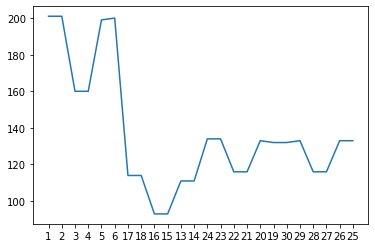

In [16]:
plt.plot(list(map(str, ak_arrays.columns)), ak_arrays.max());

In [17]:
ak_arrays.max().to_csv("Drift_Chamber_Maximums.csv")

In [19]:
boundaries = ["1", "6", "14", "25", "19"]
boundaryColors = ['cyan', 'lime', 'yellow', 'pink']

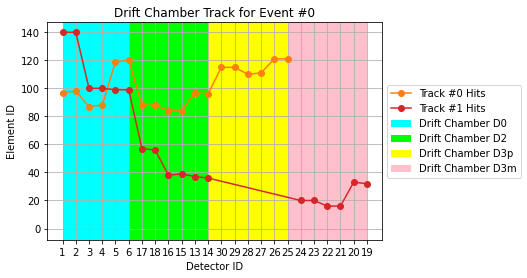

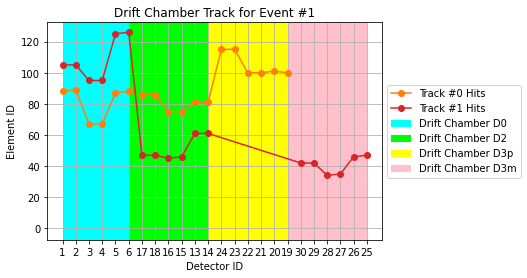

In [20]:
x_axis = np.array(ak_arrays.columns, dtype=str)
for (index, subindex), row in ak_arrays.iterrows(): #subindex indicates either first muon or second muon
    if index > 1:
        break
    row = np.array(row)
#     for n, (col_name, row_item) in enumerate(zip(ak_arrays.columns, row)):
#         scaled_value = elementIDScaling(ak_arrays, col_name, row_item)
#         row[n] = scaled_value
#     print(row)
    
    if subindex == 0:
#         plt.figure(figsize=(10,7));
        plt.figure();
    temp, = plt.plot(row);
    mask = []
    for n, elementID in enumerate(row):
        if elementID <= -1:
            mask.append(False)
        else:
            mask.append(True)
    temp.remove();
    plt.plot(x_axis[mask], row[mask], marker='o', label="Track #"+str(subindex) + " Hits");
    
    if subindex == 1:
        for n, boundary in enumerate(boundaries[:-1]):
            plt.gca().axvspan(boundary, boundaries[n+1], facecolor=boundaryColors[n], alpha=1,
                              label="Drift Chamber " + drift_chamber_boundaries[n])
#             plt.gca().axvline(detectorID, label="End of detector " + chamber)
    
    plt.legend(bbox_to_anchor=[1, 0.5], loc='center left');
    plt.xlabel("Detector ID");
    plt.ylabel("Element ID");
    plt.title("Drift Chamber Track for Event #"+str(index));
    plt.grid(visible=True, which='both', axis='both');

#     plt.tight_layout();
    

In [21]:
combined_total #cell size, ncells, angle, width, height, z

{1: ('D0U_ele', 0.635, 201, 0.245, 101.6, 121.92, 594.49),
 2: ('D0Up_ele', 0.635, 201, 0.245, 101.6, 121.92, 595.13),
 3: ('D0X_ele', 0.635, 160, 0, 101.6, 121.92, 617.09),
 4: ('D0Xp_ele', 0.635, 160, 0, 101.6, 121.92, 617.72),
 5: ('D0V_ele', 0.635, 201, -0.245, 101.6, 121.92, 637.17),
 6: ('D0Vp_ele', 0.635, 201, -0.245, 101.6, 121.92, 637.81),
 17: ('D2U_ele', 2.021, 128, 0, 233.27, 264.16, 1365.99),
 18: ('D2Up_ele', 2.021, 128, 0, 233.27, 264.16, 1372.98),
 16: ('D2X_ele', 2.083, 112, 0, 233.27, 264.16, 1347.34),
 15: ('D2Xp_ele', 2.083, 112, 0, 233.27, 264.16, 1340.36),
 13: ('D2V_ele', 2.021, 128, -0.245, 233.27, 264.16, 1314.98),
 14: ('D2Vp_ele', 2.021, 128, -0.245, 233.27, 264.16, 1321.96),
 24: ('D3pU_ele', 2, 134, -0.245, 320, 166, 1937.33),
 23: ('D3pUp_ele', 2, 134, -0.245, 320, 166, 1935.33),
 22: ('D3pX_ele', 2, 116, 0, 320, 166, 1931.33),
 21: ('D3pXp_ele', 2, 116, 0, 320, 166, 1929.33),
 20: ('D3pV_ele', 2, 134, 0.245, 320, 166, 1925.33),
 19: ('D3pVp_ele', 2, 134, 

In [70]:
def elementIDScaling(detectorID, elementID):
    max_element_ID = 201
    max_to_be_scaled_by = combined_total[detectorID][2]
    return (elementID*max_element_ID)//max_to_be_scaled_by

In [22]:
def getPlacement(name, size, angle, detectorHeight, numCells, elementHit, z_Position):
    vertical_pos = elementHit/numCells*detectorHeight
    
    if 'D3m' in name:
        vertical_pos += 166
    
    return (vertical_pos, z_Position)

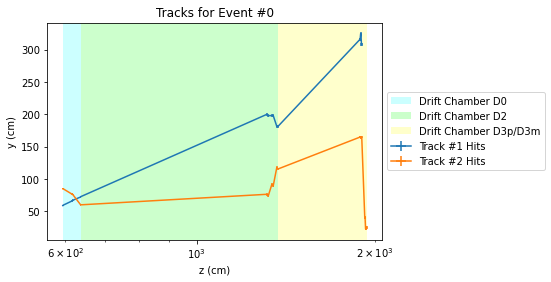

In [46]:
boundaries = [1, 6, 18, 24]
drift_chamber_boundaries = ["D0", "D2", "D3p/D3m"]

for (index, subindex), row in ak_arrays.iterrows(): #subindex indicates either first muon or second muon
    if index > 0:
        break
    row = list(row)
    
    for n, (col_name, row_item) in enumerate(zip(ak_arrays.columns, row)):
        name, cellsize, numCells, angle, width, height, z = combined_total[col_name] #get the attributes of the column
        Ypos, Zpos = getPlacement(name, cellsize, angle, height, numCells, row_item, z)
        row[n] = (Ypos, Zpos, cellsize, name)
    if subindex == 0:
        plt.figure();

    xList = []
    yList = []
    real_uncertainties = []
    real_names = []
    row = sorted(row, key=lambda x: x[1])
    for n, coordinate in enumerate(row):
        if coordinate[0] >= 0:
            xList.append(coordinate[1])
            yList.append(coordinate[0])
            real_uncertainties.append(coordinate[2])
            real_names.append(coordinate[3])
            
    
    plt.errorbar(xList, yList, xerr=real_uncertainties, yerr=real_uncertainties, 
                 label="Track #"+str(subindex + 1) + " Hits");
    plt.xscale('log');
    plt.xlabel('z (cm)');
    plt.ylabel('y (cm)');
    plt.legend(bbox_to_anchor=[1, 0.5], loc='center left');
    plt.title("Tracks for Event #"+str(index));
    
    if subindex == 0:
        for n, boundary in enumerate(boundaries[:-1]):
            plt.gca().axvspan(combined_total[boundary][-1], 
                              combined_total[boundaries[n+1]][-1], facecolor=boundaryColors[n], alpha=0.2,
                              label="Drift Chamber " + drift_chamber_boundaries[n])

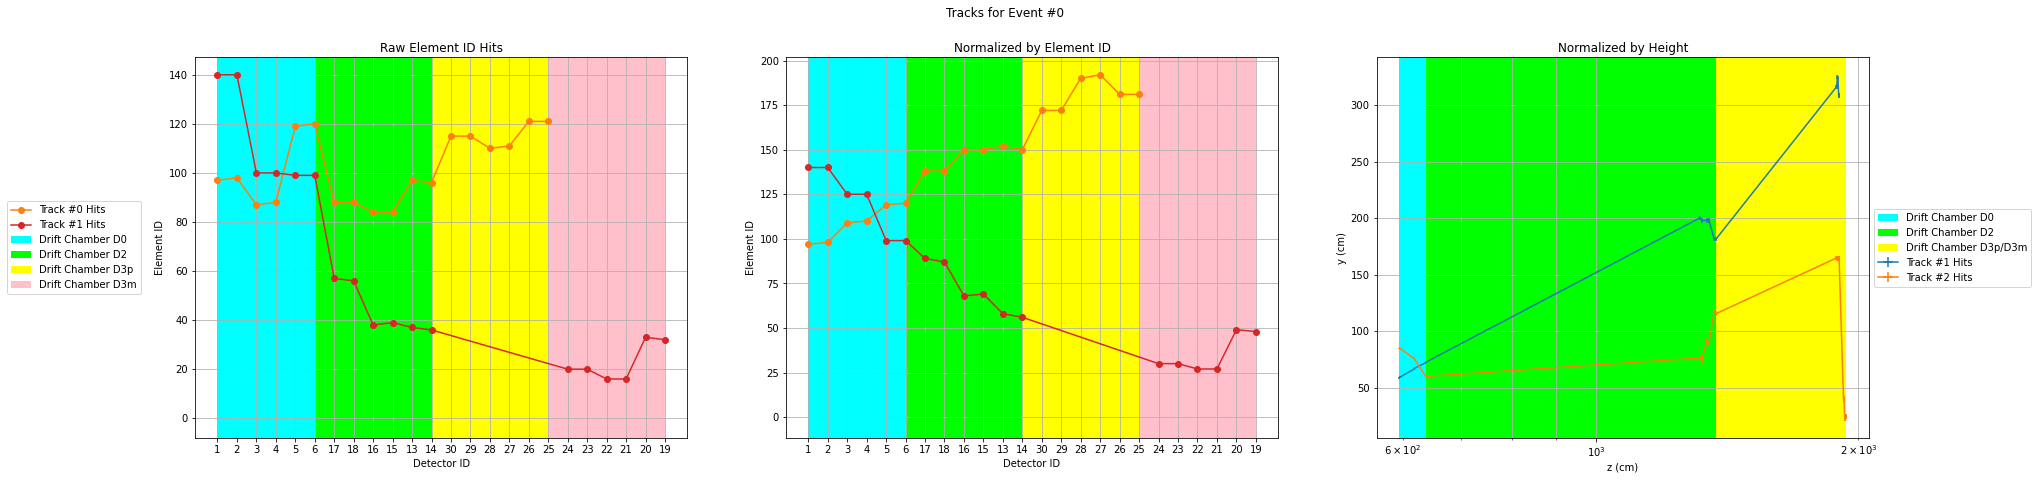

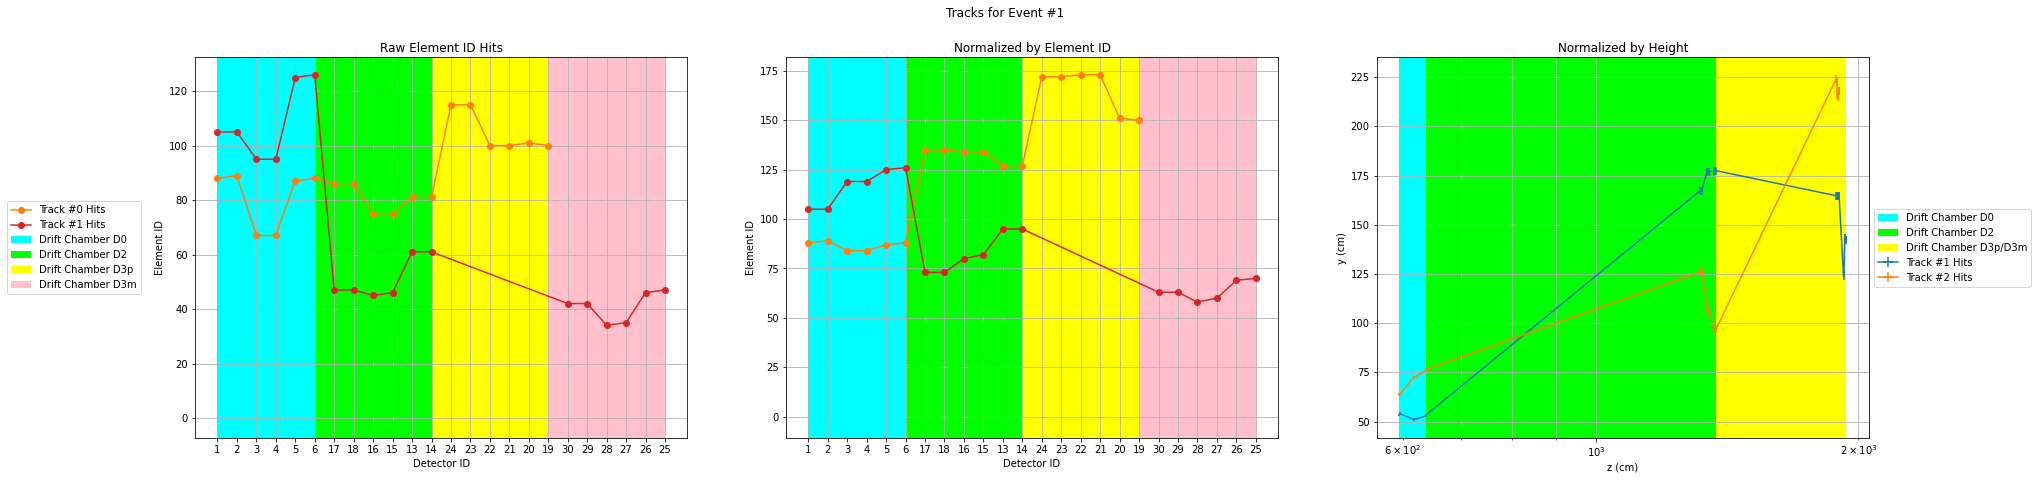

In [72]:
x_axis = np.array(ak_arrays.columns, dtype=str)
for (index, subindex), row in ak_arrays.iterrows(): #subindex indicates either first muon or second muon
    if index > 1: #condition for testing
        break
    
    scaled_row = row.copy()
    
    for detector in ak_arrays.columns:
        scaled_row[detector] = elementIDScaling(detector, scaled_row[detector])
        
    scaled_row = np.array(scaled_row)
    
    row = np.array(row)
    
    if subindex == 0:
        fig, ax = plt.subplots(1,3, figsize=(30,7)); #condition for making a new subplot
        fig.suptitle("Tracks for Event #" + str(index));
        
    ################################ BY ELEMENT ID #####################
    temp, = ax[0].plot(row);
    mask = []
    for n, elementID in enumerate(row):
        if elementID <= -1:
            mask.append(False)
        else:
            mask.append(True)
    temp.remove();
    ax[0].plot(x_axis[mask], row[mask], marker='o', label="Track #"+str(subindex) + " Hits");
    
    
    boundaries = ["1", "6", "14", "25", "19"]
    boundaryColors = ['cyan', 'lime', 'yellow', 'pink']
    drift_chamber_boundaries = ["D0", "D2", "D3p", "D3m"]
    
    if subindex == 1:
        for n, boundary in enumerate(boundaries[:-1]):
            ax[0].axvspan(boundary, boundaries[n+1], facecolor=boundaryColors[n], alpha=1,
                              label="Drift Chamber " + drift_chamber_boundaries[n])
            
    ax[0].legend(bbox_to_anchor=[-0.1, 0.5], loc='center right');
    ax[0].set_xlabel("Detector ID");
    ax[0].set_ylabel("Element ID");
    ax[0].set_title("Raw Element ID Hits");
    ax[0].grid(visible=True, which='both', axis='both');
    
    
    ###################### BY SCALED ELEMENT ID #############################
    
    temp, = ax[1].plot(scaled_row);
    mask = []
    for n, elementID in enumerate(scaled_row):
        if elementID <= -1:
            mask.append(False)
        else:
            mask.append(True)
    temp.remove();
    ax[1].plot(x_axis[mask], scaled_row[mask], marker='o', label="Track #"+str(subindex) + " Hits");
    
    
    boundaries = ["1", "6", "14", "25", "19"]
    boundaryColors = ['cyan', 'lime', 'yellow', 'pink']
    drift_chamber_boundaries = ["D0", "D2", "D3p", "D3m"]
    
    if subindex == 1:
        for n, boundary in enumerate(boundaries[:-1]):
            ax[1].axvspan(boundary, boundaries[n+1], facecolor=boundaryColors[n], alpha=1,
                              label="Drift Chamber " + drift_chamber_boundaries[n])
            
    ax[1].set_xlabel("Detector ID");
    ax[1].set_ylabel("Element ID");
    ax[1].set_title("Normalized by Element ID");
    ax[1].grid(visible=True, which='both', axis='both');
    
    ###################### BY HEIGHT ########################
    
    boundaries = [1, 6, 18, 24]
    drift_chamber_boundaries = ["D0", "D2", "D3p/D3m"]
    
    row = list(row)
    for n, (col_name, row_item) in enumerate(zip(ak_arrays.columns, row)):
        name, cellsize, numCells, angle, width, height, z = combined_total[col_name]
        Ypos, Zpos = getPlacement(name, cellsize, angle, height, numCells, row_item, z)
        row[n] = (Ypos, Zpos, cellsize, name)
    
    xList = []
    yList = []
    real_uncertainties = []
    real_names = []
    row = sorted(row, key=lambda x: x[1])
    for n, coordinate in enumerate(row):
        if coordinate[0] >= 0:
            xList.append(coordinate[1])
            yList.append(coordinate[0])
            real_uncertainties.append(coordinate[2])
            real_names.append(coordinate[3])
    
    ax[2].errorbar(xList, yList, xerr=real_uncertainties, yerr=real_uncertainties, 
                 label="Track #"+str(subindex + 1) + " Hits");
    
    if subindex == 1:
        for n, boundary in enumerate(boundaries[:-1]):
            ax[2].axvspan(combined_total[boundary][-1], 
                              combined_total[boundaries[n+1]][-1], facecolor=boundaryColors[n], alpha=1,
                              label="Drift Chamber " + drift_chamber_boundaries[n]);
    ax[2].set_xscale('log');
    ax[2].set_xlabel('z (cm)');
    ax[2].set_ylabel('y (cm)');
    ax[2].legend(bbox_to_anchor=[1, 0.5], loc='center left');
    ax[2].set_title("Normalized by Height");
    ax[2].grid(visible=True, which='both', axis='both');

In [20]:
detector = DY[DY.keys()[0]]["detectorID"].arrays(library='pd').replace(notAHit, -1).astype(np.int_)
for i in detector.columns:
    if detector[i].eq(-1).all():
        detector.drop(i, axis=1,inplace=True)
detector

,detectorID[0],detectorID[1],detectorID[2],detectorID[3],detectorID[4],detectorID[5],detectorID[6],detectorID[7],detectorID[8],detectorID[9],...,detectorID[74],detectorID[75],detectorID[76],detectorID[77],detectorID[78],detectorID[79],detectorID[80],detectorID[81],detectorID[82],detectorID[83]
0,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
99997,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
99998,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
99999,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
